In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv


## **BUSINESS PROBLEM**
## CLASSIFICATION OF PRODUCTS INTO PREMIUM,MID-RANGE,LOW-RANGE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report



In [3]:
data=pd.read_csv('/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv')
data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


**BASIC DATA EXPLORATION**

In [4]:
data.shape     #27555 rows and 10 columns

(27555, 10)

In [5]:
data.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [7]:
data.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [8]:
#Checking for missing values
data.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

**DROPPING IRRELEVANT COLUMNS**

In [9]:
data.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [10]:
data.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

**Rating has a huge number of missing values,We will deal with this**

**Lets check outliers for each numeric column**

<Axes: >

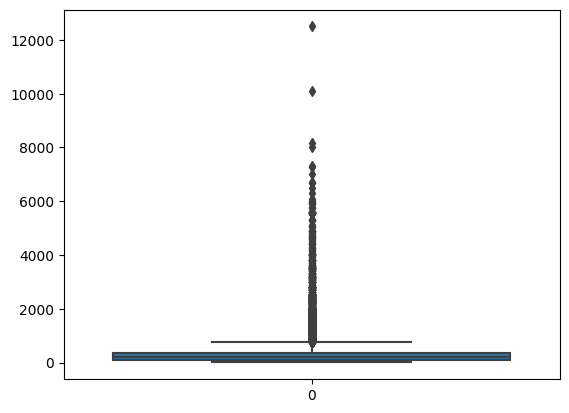

In [11]:
sns.boxplot(data['sale_price'])

<Axes: >

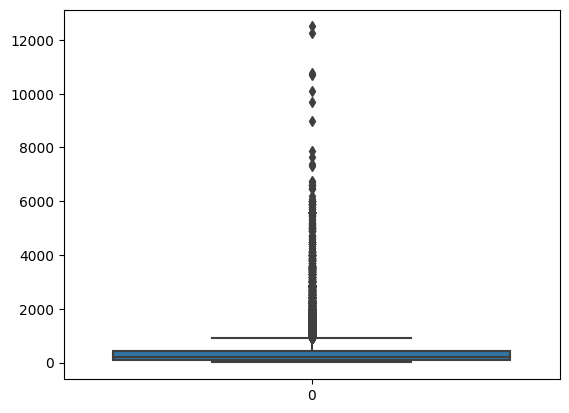

In [12]:
sns.boxplot(data['market_price'])

<Axes: >

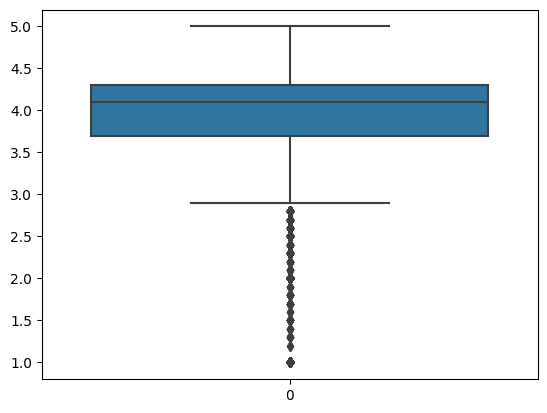

In [13]:
sns.boxplot(data['rating']) #we can see there are some outliers

In [14]:
#Outlier Treatment for Rating column
Q1=data['rating'].quantile(0.25)
Q3=data['rating'].quantile(0.75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
print(Q1,Q3,round(IQR,2),round(LL,2),round(UL,2))

3.7 4.3 0.6 2.8 5.2


In [15]:
data[(data['rating']<LL)|(data['rating']>UL)]


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
11,12,Butter Cookies Gold Collection,Gourmet & World Food,Chocolates & Biscuits,Sapphire,600.00,600.0,"Luxury Chocolates, Gifts",2.2,Enjoy a tin full of delicious butter cookies m...
29,30,Lip Butter - Rose,Beauty & Hygiene,Skin Care,Organic Harvest,169.15,199.0,Lip Care,1.5,Reload the dry and chapped lips with Organic L...
43,44,Storage/Lunch Steel Container with PP Lid - Red,"Kitchen, Garden & Pets",Steel Utensils,Classic Essentials,109.00,299.0,Steel Lunch Boxes,2.6,Add a dash of colour to your kitchen with thes...
64,65,Aqua Halo Rejuvenating Conditioner,Beauty & Hygiene,Hair Care,Azafran,168.75,225.0,Shampoo & Conditioner,1.0,This Aqua Halo Rejuvenating Conditioner is an ...
...,...,...,...,...,...,...,...,...,...,...
27415,27416,Shafair,Beauty & Hygiene,Skin Care,Shahnaz Husain,700.00,700.0,Face Care,2.0,Shahnaz Husains Shafair plus is a highly exclu...
27493,27494,De-Tan Peel Off Mask,Beauty & Hygiene,Men's Grooming,Beardo,359.10,399.0,Face & Body,2.8,"We fight pollution and sun daily, while our re..."
27498,27499,"Juicer - Fruit & Vegetable, Light Green","Kitchen, Garden & Pets",Kitchen Accessories,Ganesh,1071.00,1071.0,Kitchen Tools & Other Accessories,2.0,This juicer comes in various attractive colour...
27503,27504,Pedal Plastic Dustbin / Garbage Bin - Assorted,Cleaning & Household,Bins & Bathroom Ware,JOYO,169.00,246.0,Dustbins,2.7,This pedal dustbin is versatile and has a styl...


In [16]:
#Lets trim these outliers
data_clean=data[(data['rating']>=LL)|(data['rating']<=UL)]
data_clean.shape

(18929, 10)

In [17]:
data_clean.shape

(18929, 10)

In [18]:
data_clean.isnull().sum()

index            0
product          1
category         0
sub_category     0
brand            0
sale_price       0
market_price     0
type             0
rating           0
description     88
dtype: int64

In [19]:
data_clean.dropna(inplace=True)

/tmp/ipykernel_30/2410125117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.dropna(inplace=True)


In [20]:
data_clean.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [21]:
data_clean['product'].nunique()

16217

In [22]:
data_clean['category'].nunique()

9

In [23]:
data_clean['sub_category'].nunique()

77

In [24]:
data_clean['brand'].nunique()

1933

In [25]:
data_clean['type'].nunique()

358

In [26]:
# ESTABLISHING A THRESHOLD #OUR Target Variable
budget_threshold = 100  # Products priced below 100 are 'Budget'
premium_threshold = 500  # Products priced above 500 are 'Premium'

# Function to classify products based on sale_price
def classify_price(sale_price):
    if sale_price < budget_threshold:
        return 'Budget'
    elif sale_price > premium_threshold:
        return 'Premium'
    else:
        return 'Mid-Range'

# Apply the function to classify products
data_clean['price_category'] = data_clean['sale_price'].apply(classify_price)

/tmp/ipykernel_30/2263904883.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['price_category'] = data_clean['sale_price'].apply(classify_price)


In [27]:
data_clean.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,price_category
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,Mid-Range
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",Mid-Range
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",Mid-Range
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,Mid-Range
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,Mid-Range


#  **FEATURE ENGINEERING**

In [28]:
data_clean['Discount']=data_clean['market_price']-data['sale_price']

/tmp/ipykernel_30/4038888228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Discount']=data_clean['market_price']-data['sale_price']


In [29]:
data_clean['Dicount%']=round((data_clean['Discount']/data_clean['market_price'])*100,2)

/tmp/ipykernel_30/3122230102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Dicount%']=round((data_clean['Discount']/data_clean['market_price'])*100,2)


# **DATA ANALYSIS**

## **CATEGORY ANALYSIS**

**HIGHEST SELLING CATEGORY**

Text(0.5, 1.0, 'Count of Category')

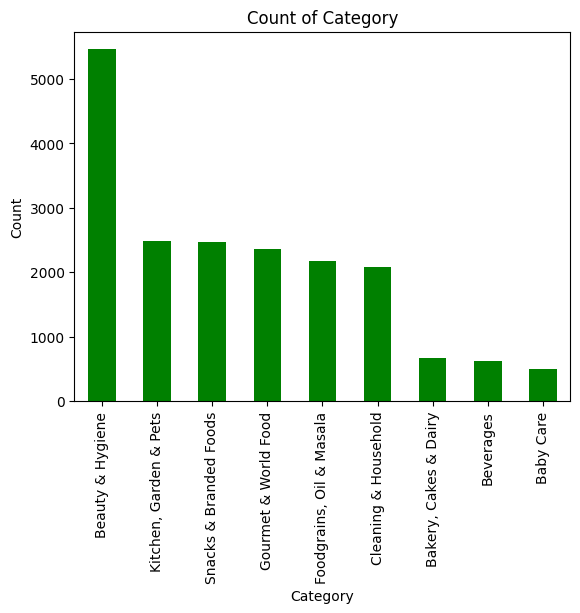

In [30]:
#Highest selling category
data_clean['category'].value_counts().plot(kind='bar',color='green')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Category')

**Which Category got the highest rating**

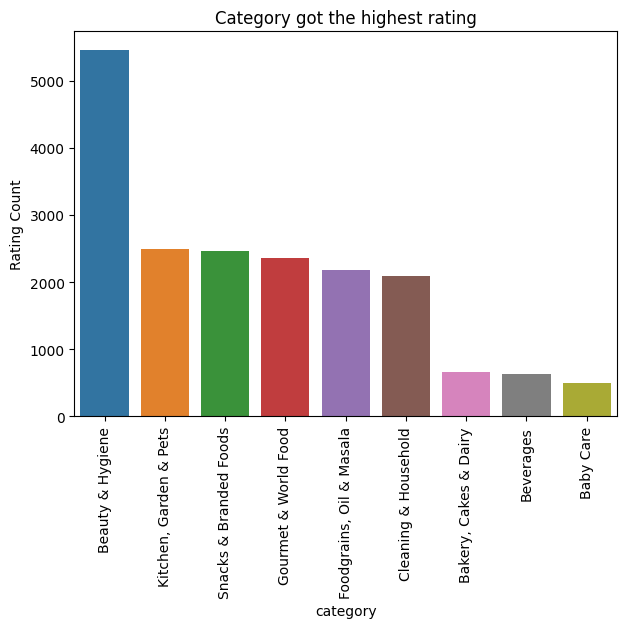

In [31]:
x=data_clean.groupby("category")["rating"].count()
y=x.sort_values(ascending=False)

plt.figure(figsize = (7,5))
sns.barplot(x=y.index, y=y.values)
plt.xticks(rotation = 90)
plt.ylabel("Rating Count")
plt.title("Category got the highest rating")
plt.show()

**HIGHEST SELLING SUB_CATEGORY**

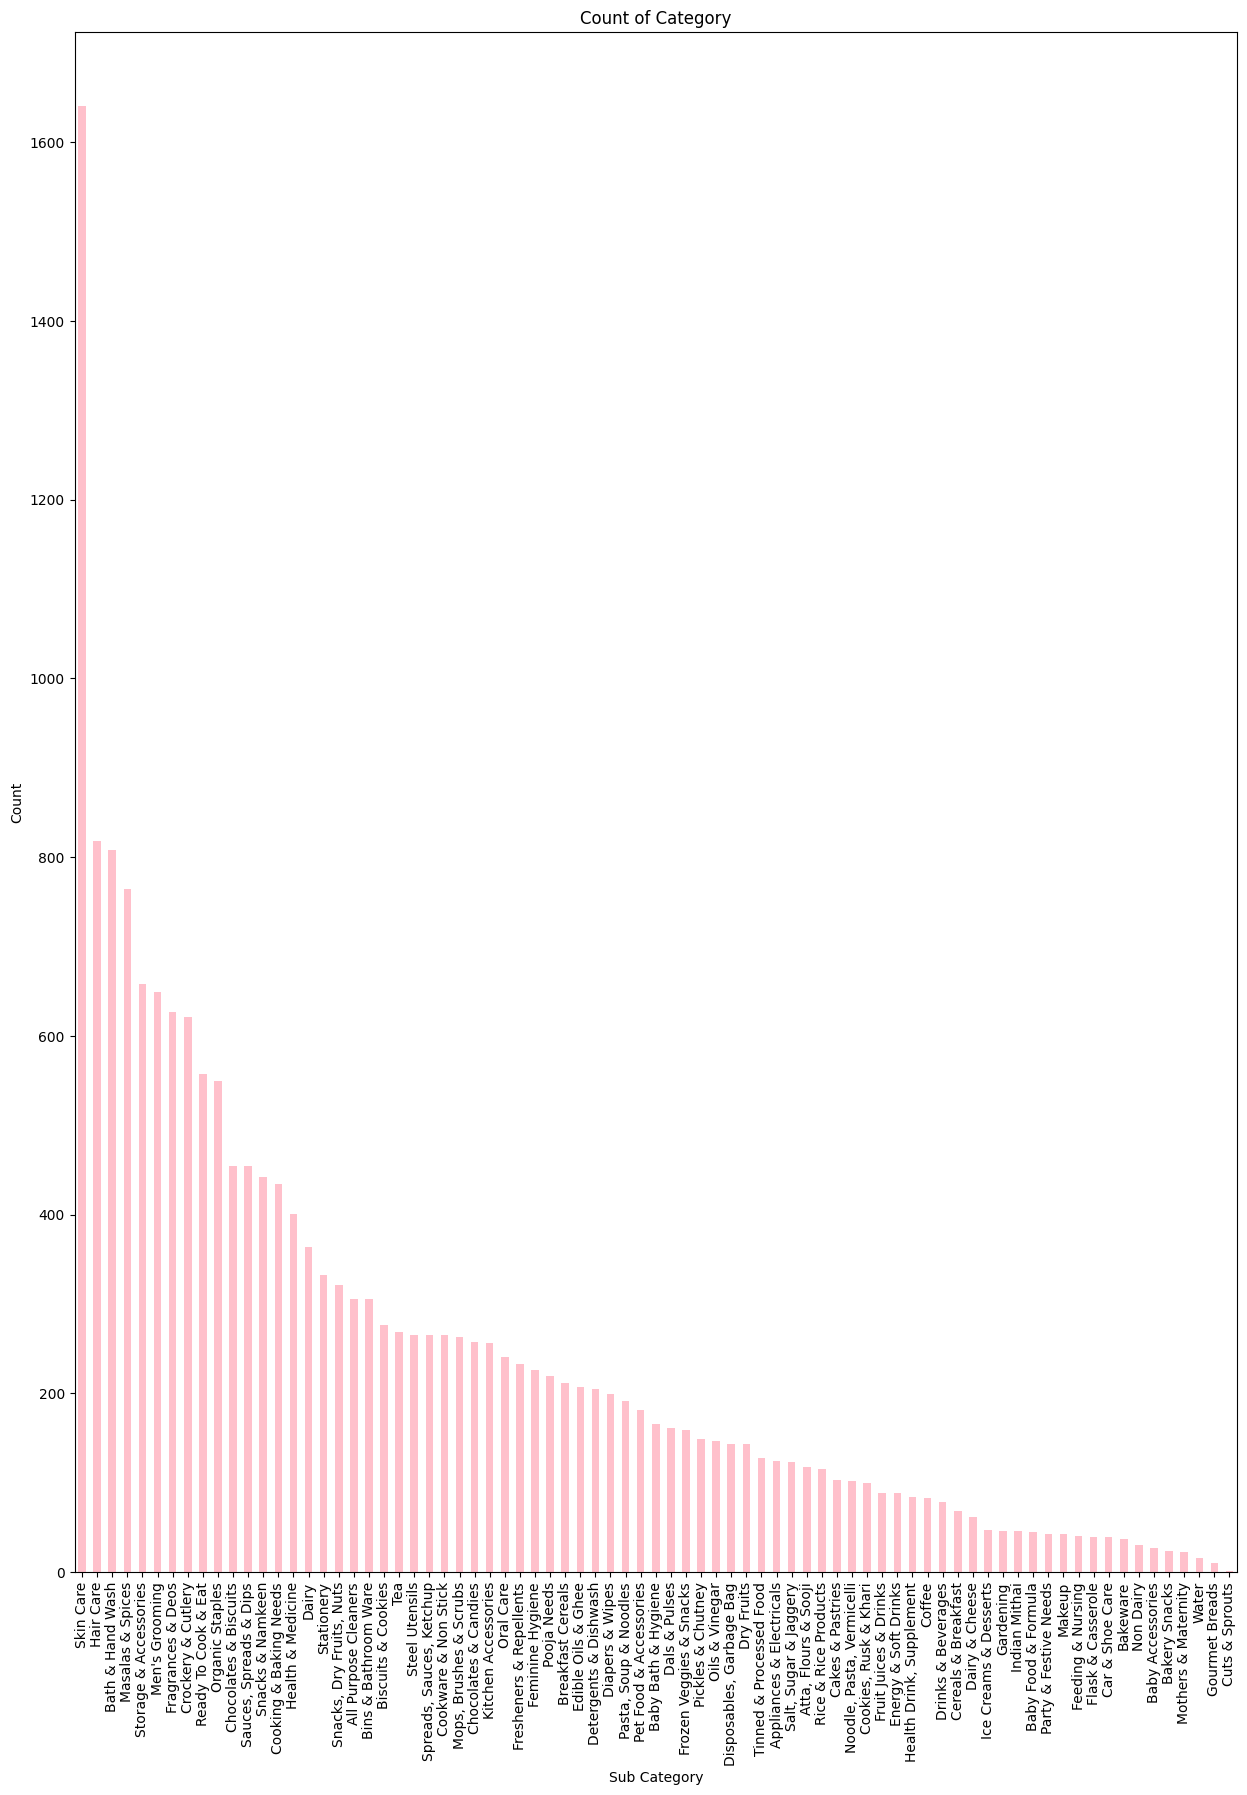

In [32]:
#Highest selling category
plt.figure(figsize=(15,20))
data_clean['sub_category'].value_counts().plot(kind='bar',color='pink')
plt.xlabel('Sub Category')
plt.ylabel('Count')
plt.title('Count of Category')
plt.show()

**EXPLORING BEAUTY & HYGIENCE CATEGORY**

In [33]:

data_bh=data_clean[data_clean['category']=='Beauty & Hygiene']
data_bh['sub_category'].value_counts()                   #Under Beauty and Hygiene ,skin care and hair care are the most selling categories

sub_category
Skin Care              1641
Hair Care               818
Bath & Hand Wash        808
Men's Grooming          649
Fragrances & Deos       627
Health & Medicine       401
Oral Care               241
Feminine Hygiene        226
Makeup                   43
Mothers & Maternity       6
Name: count, dtype: int64

In [34]:
d1=data_bh.groupby('sub_category')['rating'].mean().sort_values(ascending=False)
d1.head()



sub_category
Feminine Hygiene       4.123009
Oral Care              4.121577
Bath & Hand Wash       4.099876
Hair Care              3.974083
Mothers & Maternity    3.966667
Name: rating, dtype: float64

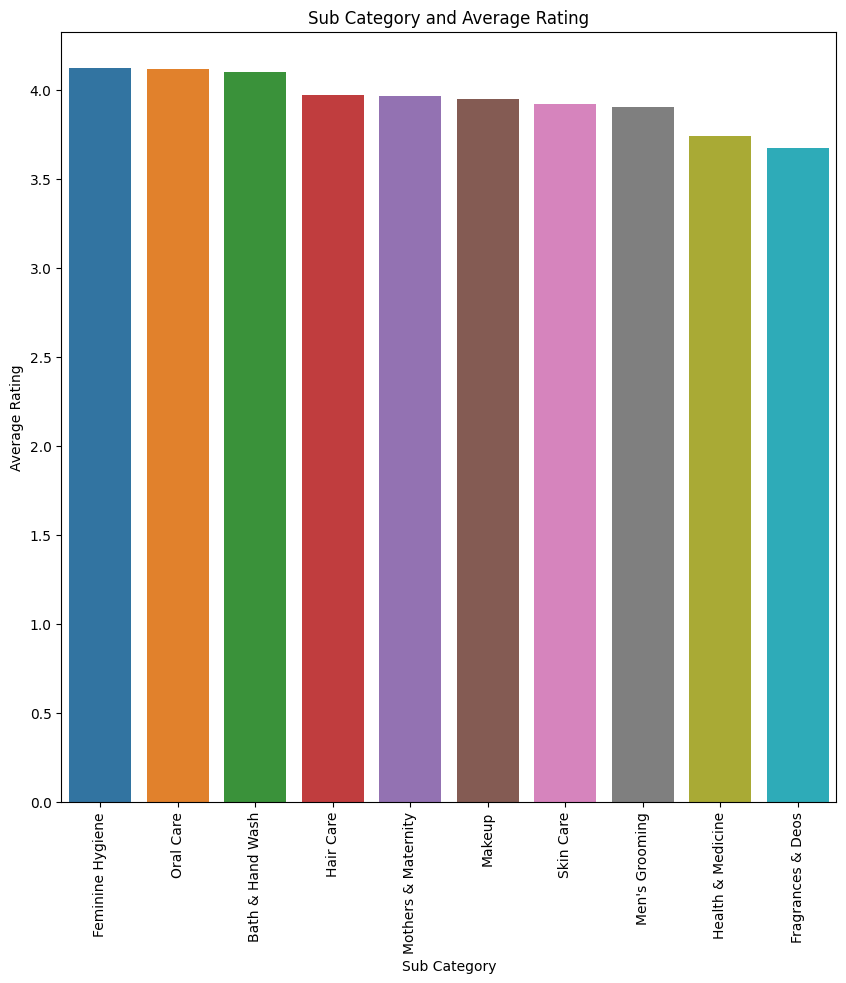

In [35]:
# Bar plot to visualize average rating across sub_categories in Beauty & Hygiene 
plt.figure(figsize=(10, 10))
sns.barplot(x=d1.index, y=d1.values)
plt.xlabel('Sub Category')
plt.xticks(rotation = 90)
plt.ylabel("Average Rating")
plt.title("Sub Category and Average Rating")
plt.show()

In [36]:
d1=data_bh.groupby('brand').agg(avg_rating=('rating','mean')).reset_index().sort_index(ascending=False)
d1.head()

,brand,avg_rating
527,mJOY,5.00
526,ezy,2.85
525,bigbasket,4.30
524,Zandu,4.40
523,ZM LABS,3.80


## **DISTRIBUTION OF NUMERICAL FEATURES**

/tmp/ipykernel_30/3158377705.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean['sale_price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sale_price', ylabel='Density'>

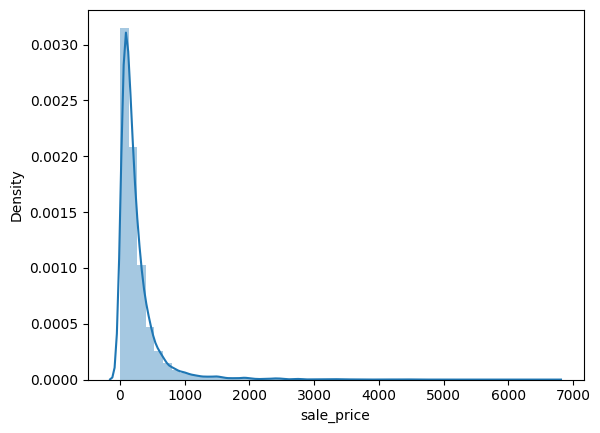

In [37]:
#Distribution of market_price and sale_price
sns.distplot(data_clean['sale_price'])

/tmp/ipykernel_30/2582029531.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean['Discount'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Discount', ylabel='Density'>

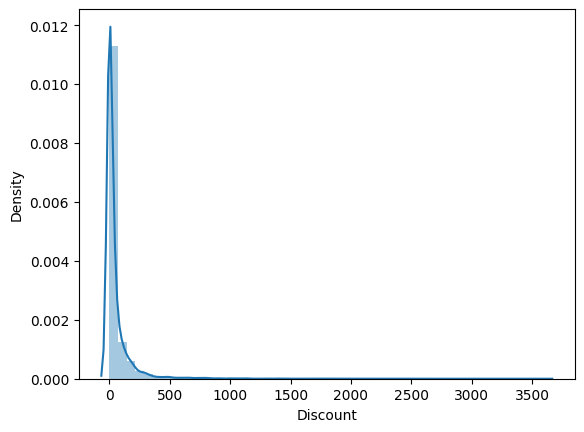

In [38]:
sns.distplot(data_clean['Discount'])

# **WHICH CATEGORY HAS THE HIGHEST MEAN AVERAGE DISCOUNT**

In [39]:
#See which category has higher average discounts
d1=data_clean.groupby('category')['Discount'].mean().sort_values(ascending=False)
fig=px.bar(d1,x=d1.index,y=d1.values,title='Category and Discount')
fig.show()  

# **DOES DISCOUNT AFFECT RATING**

In [40]:
#Correlation of Discount with rating
fig = px.scatter(data_clean, x='Discount', y="rating",title="Discount v/s rating")
fig.update_xaxes(title_text='Discount', title_font_color='white')  
fig.update_yaxes(title_text='rating', title_font_color='white') 
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white')
fig.show()  

In [41]:
print(data_clean['Discount'].corr(data_clean['rating']))

-0.09727215210671322


<Axes: xlabel='price_category', ylabel='count'>

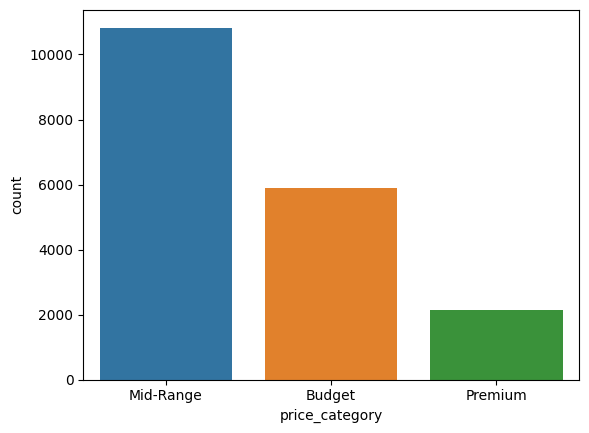

In [42]:
sns.countplot(x='price_category',data=data_clean)

# **The top-selling categories and sub-categories by rating and frequency of appearance.**

In [43]:
# Grouping by category and sub-category to find the frequency of appearance and average rating
category_subcategory_analysis = data_clean.groupby(['category', 'sub_category']).agg(
    count=('product', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()

# Sorting by frequency of appearance (count) to determine top-selling categories and sub-categories
top_categories_subcategories = category_subcategory_analysis.sort_values(by='count', ascending=False)

# Displaying top 10 categories and sub-categories by frequency of appearance
top_categories_subcategories.head(10)

,category,sub_category,count,avg_rating
23,Beauty & Hygiene,Skin Care,1641,3.924010
17,Beauty & Hygiene,Hair Care,818,3.974083
14,Beauty & Hygiene,Bath & Hand Wash,808,4.099876
45,"Foodgrains, Oil & Masala",Masalas & Spices,764,4.115314
70,"Kitchen, Garden & Pets",Storage & Accessories,658,3.713678
20,Beauty & Hygiene,Men's Grooming,649,3.907550
16,Beauty & Hygiene,Fragrances & Deos,627,3.672887
64,"Kitchen, Garden & Pets",Crockery & Cutlery,621,3.817874
79,Snacks & Branded Foods,Ready To Cook & Eat,557,3.907899
46,"Foodgrains, Oil & Masala",Organic Staples,550,4.026727


# **The top-performing and lowest-performing brands by average rating**

In [44]:
# Grouping the data by brand to find the average rating

brand_rating_price_analysis = data_clean.groupby('brand')['rating'].mean()
# Sorting by average rating to identify the top-performing and lowest-performing brands
top_performing_brands = brand_rating_price_analysis.sort_values(ascending=False).head(10)
top_performing_brands
print('*******************')




*******************


In [45]:
Low_performing_brands = brand_rating_price_analysis.sort_values(ascending=True).head(10)
Low_performing_brands

brand
Jayanthi Coffee    1.0
Sanjeev Kapoor     1.0
Healthy Gut        1.0
Diamond            1.0
Novagold           1.0
Cleox              1.0
ZOROY              1.0
Sakura             1.0
Spc                1.0
GoYNG              1.0
Name: rating, dtype: float64

# **SALE_PRICE V/S RATING**

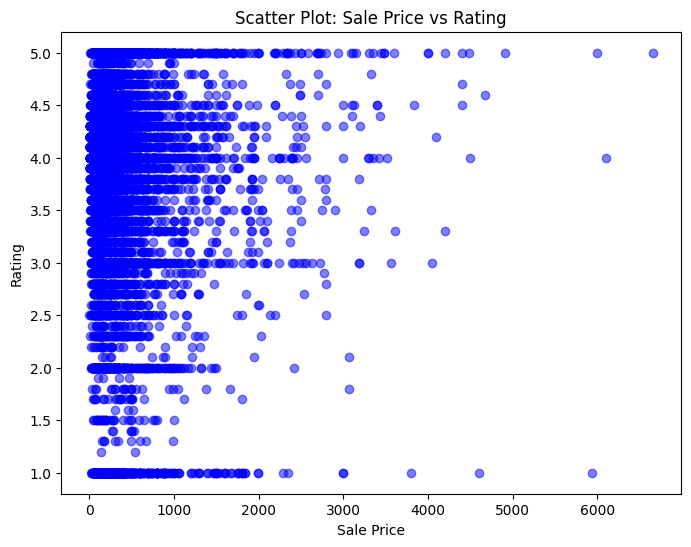

Correlation between sale price and rating: -0.08


In [46]:
# Scatter plot to visualize the relationship between sale price and rating
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(data_clean['sale_price'], data_clean['rating'], color='blue', alpha=0.5)  # Scatter plot

# Adding labels and title
plt.title('Scatter Plot: Sale Price vs Rating')
plt.xlabel('Sale Price')
plt.ylabel('Rating')

# Show the plot
plt.show()

# Calculating the correlation between sale price and rating
price_rating_corr = data_clean['sale_price'].corr(data_clean['rating'])

print(f"Correlation between sale price and rating: {price_rating_corr:.2f}")




# **PRICE RANGE ANALYSIS**

Average rating across price ranges:
  price_range  avg_rating
0       0-100    4.023181
1     100-500    3.931535
2    500-1000    3.784758
3   1000-5000    3.747573
4       5000+    3.750000


/tmp/ipykernel_30/3354421780.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_30/3354421780.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



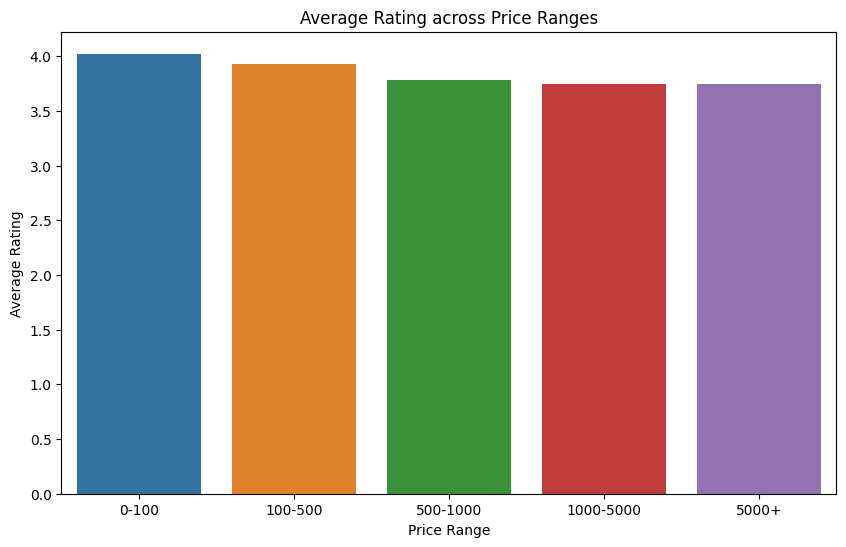

In [47]:

data_clean['price_range'] = pd.cut(data_clean['sale_price'], bins=[0, 100, 500, 1000, 5000, 10000], 
                                       labels=['0-100', '100-500', '500-1000', '1000-5000', '5000+'])

price_range_analysis = data_clean.groupby('price_range').agg(
    avg_rating=('rating', 'mean')).reset_index()

# Displaying the average rating for each price range
print("Average rating across price ranges:")
print(price_range_analysis)

# Bar plot to visualize average rating across price ranges
plt.figure(figsize=(10, 6))
sns.barplot(x='price_range', y='avg_rating', data=price_range_analysis)
plt.title('Average Rating across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

**TOP 10 SELLING PRODUCTS**

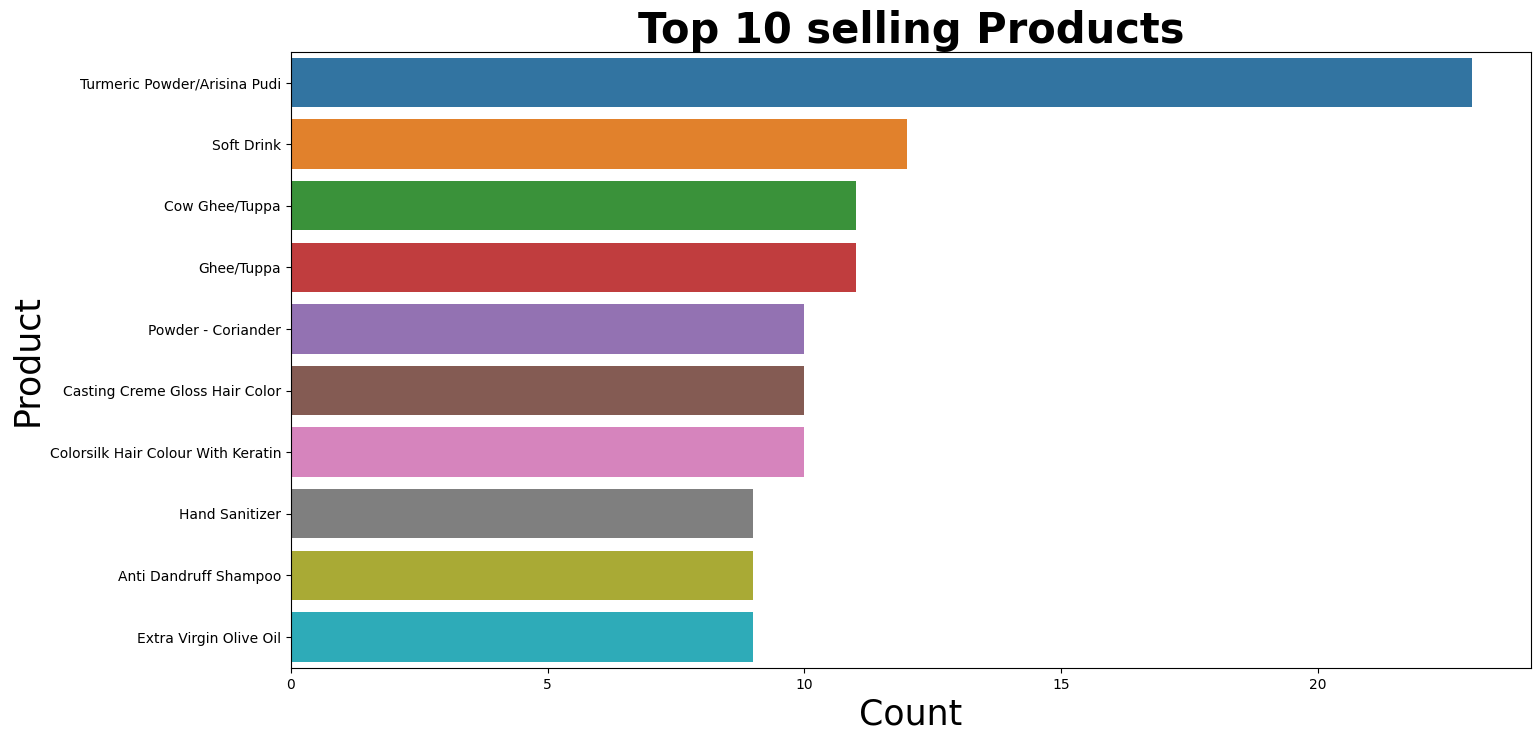

In [48]:
data = data_clean['product'].value_counts()[:10]
plt.figure(figsize=(16,8))
sns.barplot(x=data,y=data.index)
plt.xlabel('Count',fontdict={'fontsize': 25})
plt.ylabel('Product',fontdict={'fontsize': 25})
plt.title('Top 10 selling Products',fontweight="bold",fontdict={'fontsize': 30})
plt.rcParams['font.size'] = 15

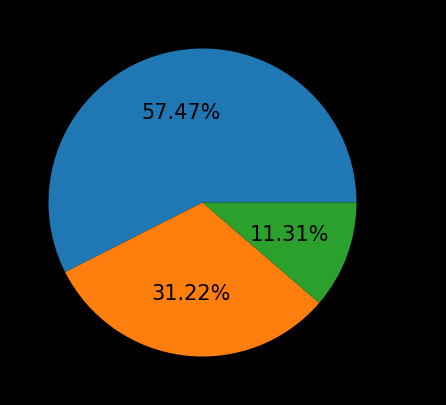

In [49]:
price_category=data_clean['price_category'].value_counts()
plt.figure(figsize=(5,5),facecolor='black')
plt.pie(price_category,autopct='%1.2f%%',labels=['Mid-Range','Premium','Budget'])
plt.show()

# There exists class imbalance


### **DATA PREPROCESSING**

In [50]:
data_clean.isnull()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,price_category,Discount,Dicount%,price_range
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27550,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27551,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27552,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27553,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Cleaning a few columns and removing less frequent items**

In [51]:
product_value=data_clean['product'].value_counts()
product_value

product
Turmeric Powder/Arisina Pudi                                                                   23
Soft Drink                                                                                     12
Cow Ghee/Tuppa                                                                                 11
Ghee/Tuppa                                                                                     11
Powder - Coriander                                                                             10
                                                                                               ..
Bio Sandalwood Lotion - 50 Spf Sunscreen For All Skin Types In The Sun Very Water Resistant     1
Tortoise Plate                                                                                  1
Moroccan Argan Oil Ultra Nourishing Body Lotion                                                 1
Ultimate Desire For Women                                                                       1
Green Tea - 

In [52]:
product_lessthan_5 = product_value[product_value<5]
product_lessthan_5

product
Super Tight Plastic Container - Printed, Assorted Colour                                       4
Daily Choco Almond Bar                                                                         4
Quinoa                                                                                         4
Chikki, Peanut Bar                                                                             4
Dishwasher Salt                                                                                4
                                                                                              ..
Bio Sandalwood Lotion - 50 Spf Sunscreen For All Skin Types In The Sun Very Water Resistant    1
Tortoise Plate                                                                                 1
Moroccan Argan Oil Ultra Nourishing Body Lotion                                                1
Ultimate Desire For Women                                                                      1
Green Tea - Pure Origi

In [53]:
def handle_product(value):
    if (value in product_lessthan_5):
        return "Others"
    else:
        return value

data_clean["product"] = data_clean["product"].apply(handle_product)
p=data_clean["product"].value_counts()
p

product
Others                            18397
Turmeric Powder/Arisina Pudi         23
Soft Drink                           12
Cow Ghee/Tuppa                       11
Ghee/Tuppa                           11
                                  ...  
Anti-Dandruff Shampoo                 5
Cheese - Slices                       5
Powder - Black Pepper                 5
Kasuri Methi                          5
Casting Crème Gloss Small Pack        5
Name: count, Length: 68, dtype: int64

In [54]:
sub_category_value =data_clean["sub_category"].value_counts()
sub_category_value

sub_category
Skin Care                1641
Hair Care                 818
Bath & Hand Wash          808
Masalas & Spices          764
Storage & Accessories     658
                         ... 
Bakery Snacks              24
Mothers & Maternity        23
Water                      16
Gourmet Breads             10
Cuts & Sprouts              1
Name: count, Length: 77, dtype: int64

In [55]:
sub_category_lessthan_500 = sub_category_value[sub_category_value<500]
sub_category_lessthan_500

sub_category
Chocolates & Biscuits     454
Sauces, Spreads & Dips    454
Snacks & Namkeen          442
Cooking & Baking Needs    434
Health & Medicine         401
                         ... 
Bakery Snacks              24
Mothers & Maternity        23
Water                      16
Gourmet Breads             10
Cuts & Sprouts              1
Name: count, Length: 67, dtype: int64

In [56]:
def handle_sub_cat(value):
    if (value in sub_category_lessthan_500):
        return "Others"
    else:
        return value

data_clean["sub_category"] = data_clean["sub_category"].apply(handle_sub_cat)
sub_cat =data_clean["sub_category"].value_counts()
sub_cat

sub_category
Others                   11147
Skin Care                 1641
Hair Care                  818
Bath & Hand Wash           808
Masalas & Spices           764
Storage & Accessories      658
Men's Grooming             649
Fragrances & Deos          627
Crockery & Cutlery         621
Ready To Cook & Eat        557
Organic Staples            550
Name: count, dtype: int64

In [57]:
brand_value =data_clean["brand"].value_counts()
brand_value

brand
bb Royal     278
BB Home      172
Amul         153
Himalaya     139
Cello        104
            ... 
Fazlani        1
Fakira         1
Sofia          1
Dr. Schar      1
4700BC         1
Name: count, Length: 1933, dtype: int64

In [58]:
brand_lessthan_100 = brand_value[brand_value< 100]
brand_lessthan_100

brand
Organic Tattva    99
MTR               97
Iveo              92
Colgate           91
Britannia         91
                  ..
Fazlani            1
Fakira             1
Sofia              1
Dr. Schar          1
4700BC             1
Name: count, Length: 1925, dtype: int64

In [59]:
def handlebrand(value):
    if (value in brand_lessthan_100):
        return "Others"
    else:
        return value

data_clean["brand"] = data_clean["brand"].apply(handlebrand)
b= data_clean["brand"].value_counts()
b

brand
Others      17689
bb Royal      278
BB Home       172
Amul          153
Himalaya      139
Cello         104
BIOTIQUE      103
DP            101
Keya          101
Name: count, dtype: int64

In [60]:
type_value =data_clean["type"].value_counts()
type_value

type
Face Care                 1094
Men's Deodorants           404
Shampoo & Conditioner      390
Blended Masalas            343
Containers Sets            332
                          ... 
Health Supplements           1
Bagels & Baguette            1
Gift Wraps & Bags            1
Gourmet Tea & Tea Bags       1
Gourmet Popcorn              1
Name: count, Length: 358, dtype: int64

In [61]:
type_lessthan_200 = type_value[type_value< 200]
type_lessthan_200

type
Powdered Spices             195
Roasted Seeds & Nuts        183
Breakfast & Snack Mixes     180
Face & Body                 174
Organic Masalas & Spices    172
                           ... 
Health Supplements            1
Bagels & Baguette             1
Gift Wraps & Bags             1
Gourmet Tea & Tea Bags        1
Gourmet Popcorn               1
Name: count, Length: 348, dtype: int64

In [62]:
def handle_type(value):
    if (value in type_lessthan_200):
        return "Others"
    else:
        return value

data_clean["type"] = data_clean["type"].apply(handle_type)
T = data_clean["type"].value_counts()
T

type
Others                      14995
Face Care                    1094
Men's Deodorants              404
Shampoo & Conditioner         390
Blended Masalas               343
Containers Sets               332
Bathing Bars & Soaps          322
Glassware                     263
Body Care                     251
Namkeen & Savoury Snacks      234
Hand Wash & Sanitizers        212
Name: count, dtype: int64

In [63]:
data_clean.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,price_category,Discount,Dicount%,price_range
0,1,Others,Beauty & Hygiene,Hair Care,Others,220.0,220.0,Others,4.1,This Product contains Garlic Oil that is known...,Mid-Range,0.0,0.00,100-500
1,2,Others,"Kitchen, Garden & Pets",Storage & Accessories,Others,180.0,180.0,Others,2.3,"Each product is microwave safe (without lid), ...",Mid-Range,0.0,0.00,100-500
2,3,Others,Cleaning & Household,Others,Others,119.0,250.0,Others,3.4,"A perfect gift for all occasions, be it your m...",Mid-Range,131.0,52.40,100-500
3,4,Others,Cleaning & Household,Others,Others,149.0,176.0,Others,3.7,Multipurpose container with an attractive desi...,Mid-Range,27.0,15.34,100-500
4,5,Others,Beauty & Hygiene,Bath & Hand Wash,Others,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,Mid-Range,0.0,0.00,100-500


In [64]:
data_clean.drop(['description'],axis=1,inplace=True)

### **ENCODING THE CATEGORICAL COLUMNS**

In [65]:
categorical=[col for col in data_clean.columns if data_clean[col].dtype=='object' and col!='price_category']
categorical   #we need to encode these features

['product', 'category', 'sub_category', 'brand', 'type']

### **Frequency Encoding**

In [66]:
freq_prod=data_clean['product'].value_counts()
data_clean['product_encoded'] = data_clean['product'].map(freq_prod)


In [67]:
freq_category=data_clean['category'].value_counts()
data_clean['category_encoded'] = data_clean['category'].map(freq_category)

In [68]:
freq_sub_category=data_clean['sub_category'].value_counts()
data_clean['sub_category_encoded'] = data_clean['sub_category'].map(freq_sub_category)

In [69]:
freq_brand=data_clean['brand'].value_counts()
data_clean['brand_encoded'] = data_clean['brand'].map(freq_brand)

In [70]:
freq_type=data_clean['type'].value_counts()
data_clean['type_encoded'] = data_clean['type'].map(freq_type)

In [71]:
#Dropping categorical columns.
data_clean.drop(categorical,axis=1,inplace=True)

In [72]:
data_clean.drop(['index'],axis=1,inplace=True)

In [73]:
data_clean.drop(['price_range'],axis=1,inplace=True)

**LABEL ENCODING FOR OUR TARGET VARIABLE PRICE_CATEGORY**

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_clean['price_category']=le.fit_transform(data_clean['price_category'])
data_clean['price_category'].unique()

array([1, 0, 2])

In [75]:
#FINAL DATASET
data_clean.head()

,sale_price,market_price,rating,price_category,Discount,Dicount%,product_encoded,category_encoded,sub_category_encoded,brand_encoded,type_encoded
0,220.0,220.0,4.1,1,0.0,0.00,18397,5460,818,17689,14995
1,180.0,180.0,2.3,1,0.0,0.00,18397,2494,658,17689,14995
2,119.0,250.0,3.4,1,131.0,52.40,18397,2091,11147,17689,14995
3,149.0,176.0,3.7,1,27.0,15.34,18397,2091,11147,17689,14995
4,162.0,162.0,4.4,1,0.0,0.00,18397,5460,808,17689,322


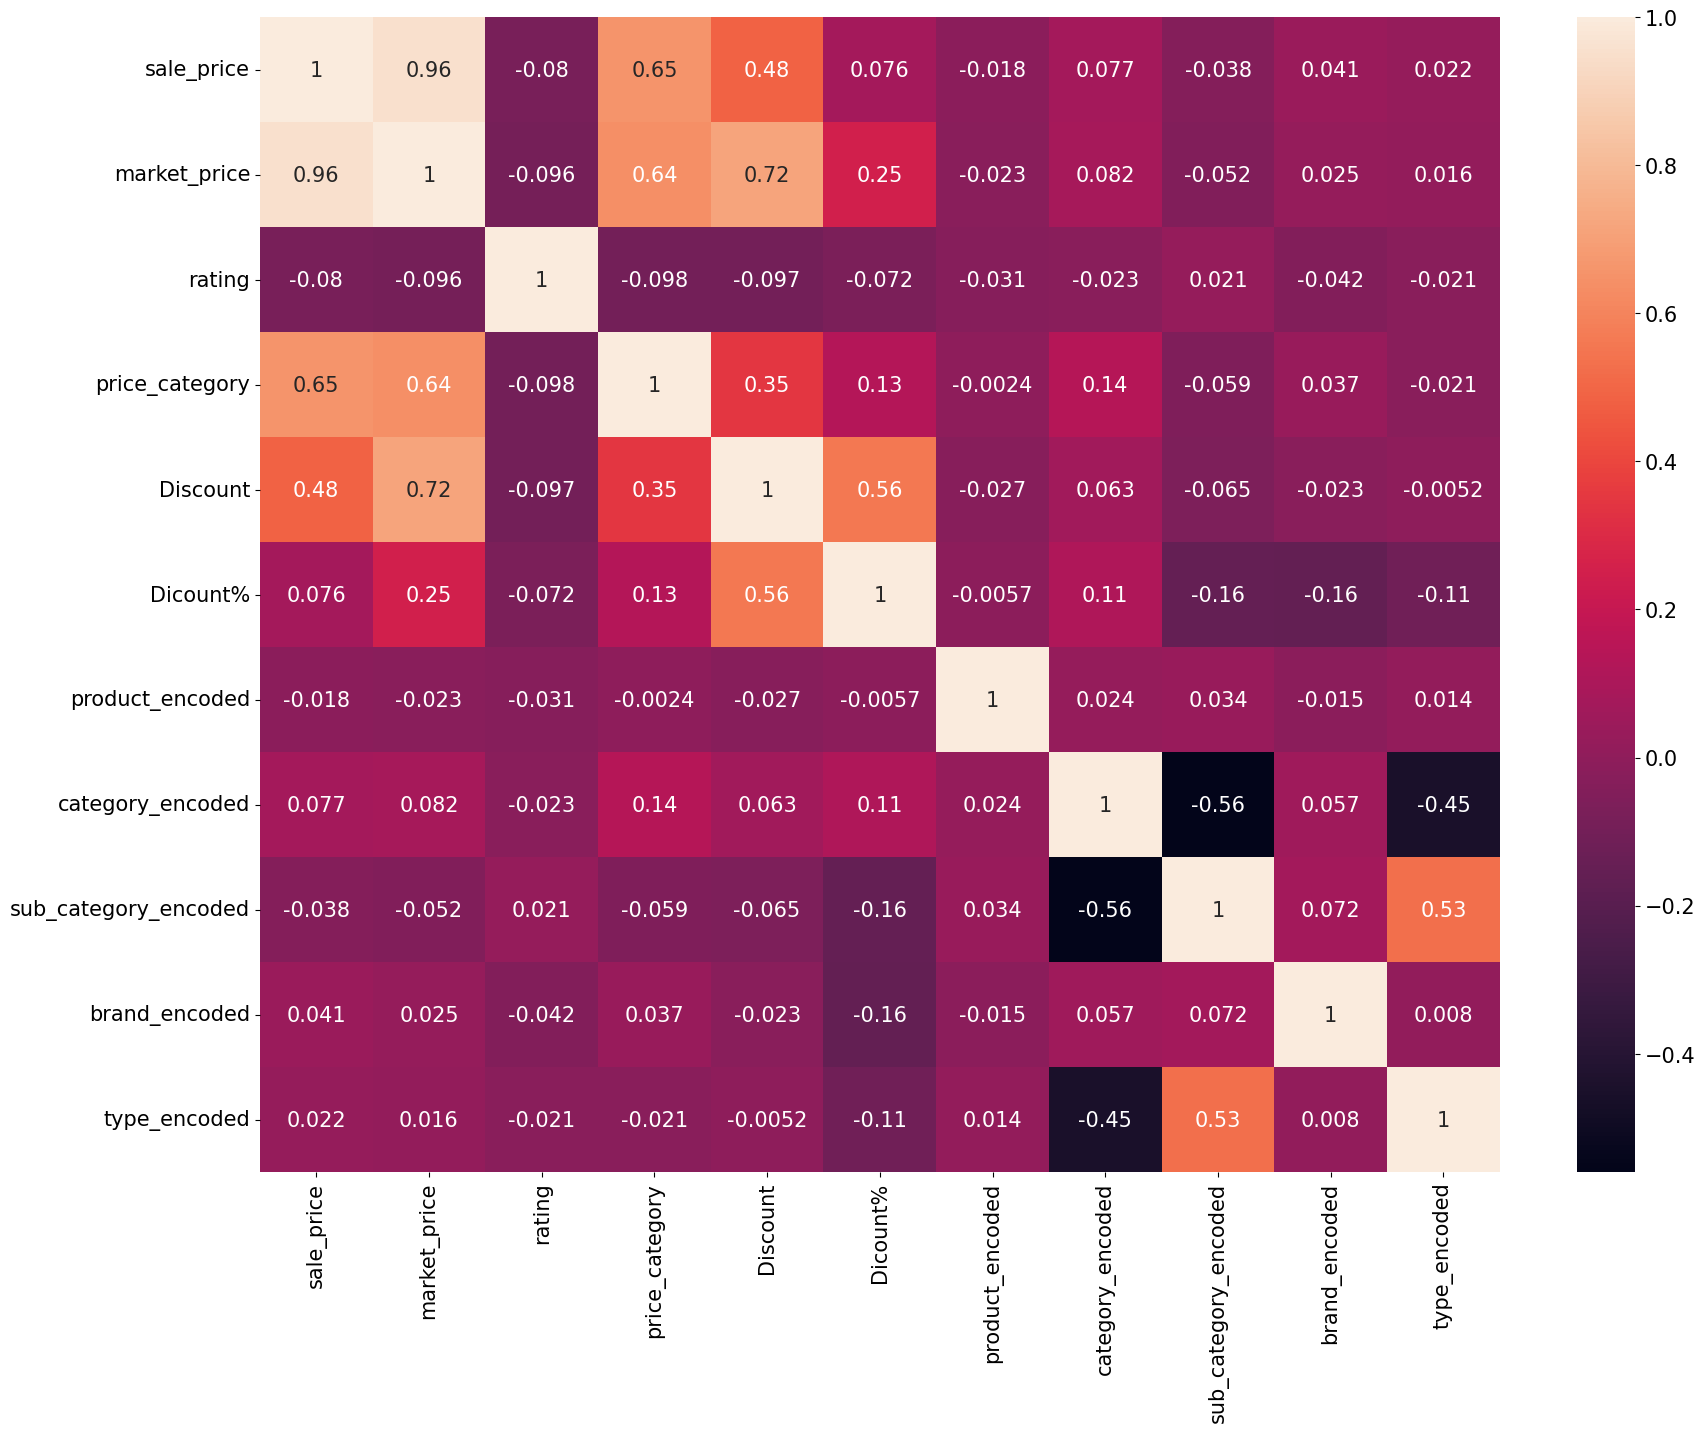

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(data_clean.corr(),annot=True)
plt.show()

#### **MODELLING**

In [77]:
X=data_clean.drop(['price_category'],axis=1)
y=data_clean['price_category']

In [78]:
y.value_counts() #class imbalance

price_category
1    10828
0     5881
2     2131
Name: count, dtype: int64

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(15072, 10)
(3768, 10)


**SMOTE TECHNIQUE TO HANDLE CLASS IMBALANCE**

In [80]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [81]:
# Check the distribution before applying SMOTE
print('Original class distribution:', Counter(y_train))

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after applying SMOTE
print('Resampled class distribution:', Counter(y_resampled))

Original class distribution: Counter({1: 8645, 0: 4726, 2: 1701})
Resampled class distribution: Counter({0: 8645, 1: 8645, 2: 8645})


#  **LOGISTIC REGRESSION**

In [82]:
lr= LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
lr.fit(X_resampled,y_resampled)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=500, multi_class='multinomial')

In [83]:
print("Training accuracy",accuracy_score(y_resampled,lr.predict(X_resampled)))
print("Testing  accuracy",accuracy_score(y_test,lr.predict(X_test)))
print("*************************")
print("Classification Report of Testing Dataset")
print(classification_report(y_test,lr.predict(X_test)))
print("*************************")
print("Classification Report of Training Dataset")
print(classification_report(y_resampled,lr.predict(X_resampled)))

Training accuracy 0.958627337574706
Testing  accuracy 0.9426751592356688
*************************
Classification Report of Testing Dataset
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1155
           1       0.98      0.92      0.95      2183
           2       0.85      0.99      0.92       430

    accuracy                           0.94      3768
   macro avg       0.92      0.96      0.94      3768
weighted avg       0.95      0.94      0.94      3768

*************************
Classification Report of Training Dataset
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8645
           1       0.95      0.92      0.94      8645
           2       0.96      0.99      0.98      8645

    accuracy                           0.96     25935
   macro avg       0.96      0.96      0.96     25935
weighted avg       0.96      0.96      0.96     25935



In [84]:
#checking cross validation score for our model
from sklearn.model_selection import cross_val_score

# Perform cross-validation and get accuracy for each fold
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", cv_scores.mean())

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/

Cross-validation scores:  [0.9522293  0.95461783 0.95143312 0.94771762 0.9522293 ]
Mean accuracy:  0.9516454352441613


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#  **DECISION TREE CLASSIFIER**

In [85]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)



DecisionTreeClassifier()

In [86]:
print("Training accuracy",accuracy_score(y_resampled,dt.predict(X_resampled)))
print("Testing  accuracy",accuracy_score(y_test,dt.predict(X_test)))
print("*************************")
print("Classification Report of Testing Dataset")
print(classification_report(y_test,dt.predict(X_test)))
print("*************************")
print("Classification Report of Training Dataset")
print(classification_report(y_resampled,dt.predict(X_resampled)))

Training accuracy 1.0
Testing  accuracy 1.0
*************************
Classification Report of Testing Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      1.00      1.00      2183
           2       1.00      1.00      1.00       430

    accuracy                           1.00      3768
   macro avg       1.00      1.00      1.00      3768
weighted avg       1.00      1.00      1.00      3768

*************************
Classification Report of Training Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8645
           1       1.00      1.00      1.00      8645
           2       1.00      1.00      1.00      8645

    accuracy                           1.00     25935
   macro avg       1.00      1.00      1.00     25935
weighted avg       1.00      1.00      1.00     25935



In [87]:
#checking cross validation score for our model
from sklearn.model_selection import cross_val_score

# Perform cross-validation and get accuracy for each fold
cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", cv_scores.mean())

Cross-validation scores:  [1.         1.         1.         1.         0.99946921]
Mean accuracy:  0.9998938428874734


In [88]:
#Checking feature importance
feature_importance_df_1=pd.DataFrame({'Feature':X.columns,'Importance':dt.feature_importances_}).sort_values(by='Importance', ascending=False)
feature_importance_df_1

,Feature,Importance
0,sale_price,1.0
1,market_price,0.0
2,rating,0.0
3,Discount,0.0
4,Dicount%,0.0
5,product_encoded,0.0
6,category_encoded,0.0
7,sub_category_encoded,0.0
8,brand_encoded,0.0
9,type_encoded,0.0


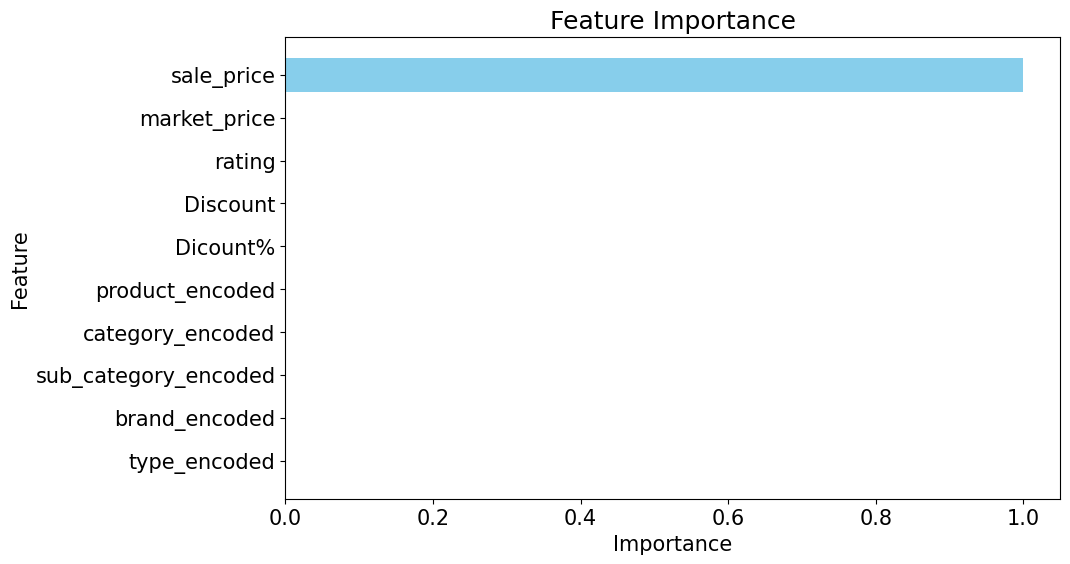

In [89]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_1['Feature'], feature_importance_df_1['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# # **RANDOMFORESTCLASSIFIER**

In [90]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [91]:
print("Training accuracy",accuracy_score(y_resampled,rf.predict(X_resampled)))
print("Testing  accuracy",accuracy_score(y_test,rf.predict(X_test)))
print("*************************")
print("Classification Report of Testing Dataset")
print(classification_report(y_test,rf.predict(X_test)))
print("*************************")
print("Classification Report of Training Dataset")
print(classification_report(y_resampled,rf.predict(X_resampled)))

Training accuracy 1.0
Testing  accuracy 1.0
*************************
Classification Report of Testing Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      1.00      1.00      2183
           2       1.00      1.00      1.00       430

    accuracy                           1.00      3768
   macro avg       1.00      1.00      1.00      3768
weighted avg       1.00      1.00      1.00      3768

*************************
Classification Report of Training Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8645
           1       1.00      1.00      1.00      8645
           2       1.00      1.00      1.00      8645

    accuracy                           1.00     25935
   macro avg       1.00      1.00      1.00     25935
weighted avg       1.00      1.00      1.00     25935



In [92]:
#checking cross validation score for our model
from sklearn.model_selection import cross_val_score

# Perform cross-validation and get accuracy for each fold
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", cv_scores.mean())

Cross-validation scores:  [1.         1.         1.         1.         0.99946921]
Mean accuracy:  0.9998938428874734


In [93]:
#Checking feature importance
feature_importance_df=pd.DataFrame({'Feature':X.columns,'Importance':rf.feature_importances_}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,sale_price,0.586822
1,market_price,0.345260
3,Discount,0.037501
4,Dicount%,0.017244
6,category_encoded,0.006685
2,rating,0.002535
7,sub_category_encoded,0.002256
9,type_encoded,0.001300
8,brand_encoded,0.000272
5,product_encoded,0.000125


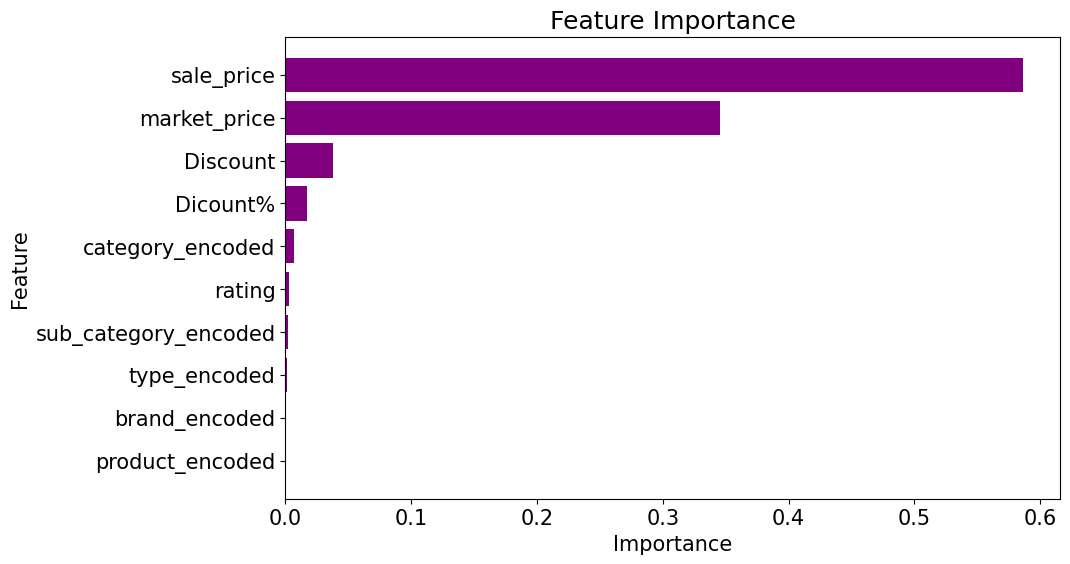

In [94]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

**LETS DROP SALE_PRICE FROM OUR DATASET AND SEE HOW DECISION TREE IS PERFORMING**

In [95]:
data_clean.columns

Index(['sale_price', 'market_price', 'rating', 'price_category', 'Discount',
       'Dicount%', 'product_encoded', 'category_encoded',
       'sub_category_encoded', 'brand_encoded', 'type_encoded'],
      dtype='object')

In [96]:
data_without_sale_price=data_clean.drop(['sale_price'],axis=1)

In [97]:
X=data_without_sale_price.drop(['price_category'],axis=1)
y=data_without_sale_price['price_category']

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(15072, 9)
(3768, 9)


In [99]:
# Check the distribution before applying SMOTE
print('Original class distribution:', Counter(y_train))

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after applying SMOTE
print('Resampled class distribution:', Counter(y_resampled))

Original class distribution: Counter({1: 8645, 0: 4726, 2: 1701})
Resampled class distribution: Counter({0: 8645, 1: 8645, 2: 8645})


In [100]:
dt.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

In [101]:
print("Training accuracy",accuracy_score(y_resampled,dt.predict(X_resampled)))
print("Testing  accuracy",accuracy_score(y_test,dt.predict(X_test)))
print("*************************")
print("Classification Report of Testing Dataset")
print(classification_report(y_test,dt.predict(X_test)))
print("*************************")
print("Classification Report of Training Dataset")
print(classification_report(y_resampled,dt.predict(X_resampled)))

Training accuracy 1.0
Testing  accuracy 0.9973460721868365
*************************
Classification Report of Testing Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      1.00      1.00      2183
           2       0.99      1.00      0.99       430

    accuracy                           1.00      3768
   macro avg       1.00      1.00      1.00      3768
weighted avg       1.00      1.00      1.00      3768

*************************
Classification Report of Training Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8645
           1       1.00      1.00      1.00      8645
           2       1.00      1.00      1.00      8645

    accuracy                           1.00     25935
   macro avg       1.00      1.00      1.00     25935
weighted avg       1.00      1.00      1.00     25935



In [102]:
#checking cross validation score for our model
from sklearn.model_selection import cross_val_score

# Perform cross-validation and get accuracy for each fold
cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", cv_scores.mean())

Cross-validation scores:  [0.9962845  0.99708068 0.99734607 0.99654989 0.99761146]
Mean accuracy:  0.9969745222929938


In [103]:
#Checking feature importance
feature_importance_df=pd.DataFrame({'Feature':X.columns,'Importance':dt.feature_importances_}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,market_price,0.907898
3,Dicount%,0.086817
2,Discount,0.003008
1,rating,0.000828
5,category_encoded,0.000710
8,type_encoded,0.000307
7,brand_encoded,0.000266
4,product_encoded,0.000167
6,sub_category_encoded,0.000000


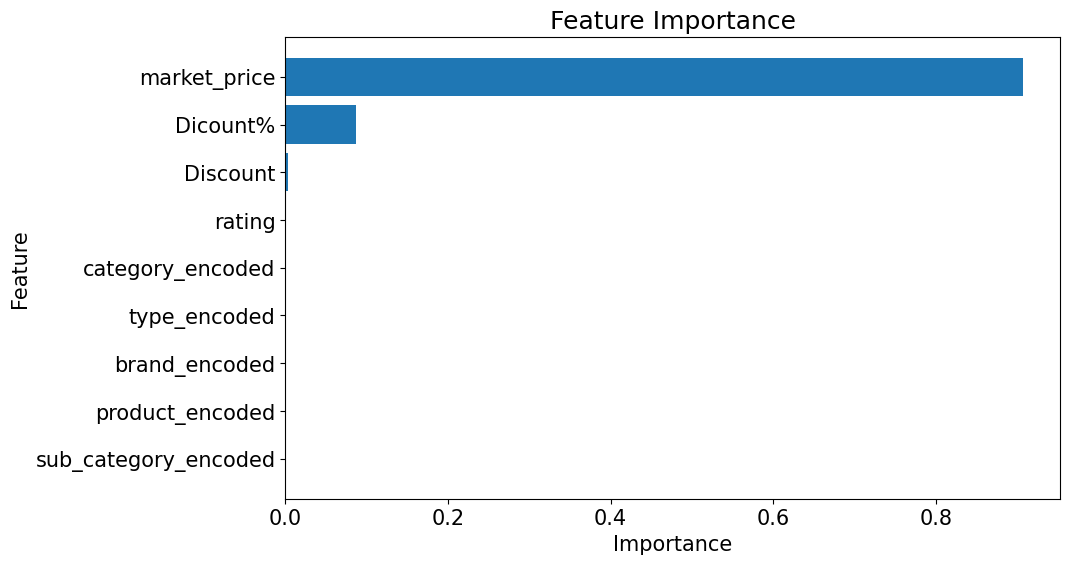

In [104]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()